<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 3rd exercise: <font color="#C70039">Binary sentiment classification with IMDB movie reviews</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   26.11.2020

* Student Name: Jüri Keller
* Matriculation number: 11133325

<img src="https://brand24.com/blog/wp-content/uploads/2017/04/Screen-Shot-2017-04-12-at-16.24.20.png" style="float: center;" width="200">

**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

--------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for a binary classification (two classes only). You will classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

The **IMDB** dataset is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.
The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

-----------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on in this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time and note the result in your markdown result table (your test plan). 
4. go into the section 'building the ANN' 
    * add the missing code that does create a network as shown in the image in the lecture slides on page 166 (File: 'DIS21a.1-7.HANDS_ON.First.DLNetwork.Architectures.for.Solving.Three.Interesting.Problems.pdf')
    * set the activation function to ReLu
    * set the correct activation function in the last layer (the output layer). What is correct?
5. stay in the 'building the ANN' section again
    * add the missing code for compiling the network by setting
        * the loss function
        * the optimizer
        * the evaluation metric (little hint: is the label distribution balanced ?)
6. take less training data and rerun the network
    * add the size of the training data as a column in the table and note the accuracy you achieve
7. take less testing data and rerun the network
    * add the size of the testing data as a column in the table and note the accuracy you achieve
8. increase/decrease the number of epochs and the batch size 
    * add those hyperparameters as columns in the table and note the accuracy you achieve
9. make combinations of this according to your testplan. Make sure you combine with sense and intelligence and not just chaotically.
10. comment your observations
    * when is the accuracy increasing / decreasing
11. until now there were 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects the test accuracy. Use again a little table. Describe your observations.
12. Try to use layers with more hidden units or less hidden units: 32 units, 64 units, 128 units ...! What effect can you observe?
13. Try to use the `mse` loss function instead of `binary_crossentropy`. What effect can you observe?
14. Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`. What effect can you observe?


## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------

In [94]:
#tensorflow and keras (implicit)
import tensorflow
tensorflow.keras.__version__

'2.4.0'

### loading the IMDB movie review data set
This code loads the dataset (when you run it for the first time on a local machine, about 80MB of data will be downloaded into the memory):

In [95]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [96]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [97]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [98]:
max([max(sequence) for sequence in train_data])

9999

### data preparation

Since lists of integers cannot be fed into a neural network, the lists need to be turned into tensors by one-hot-encoding ( vectors of 0s and 1s). This means for instance turning the sequence `[3, 5]` into a 10000-dimensional vector, that would be all-zeros except for indices 3 and 5, which would be ones. Then use as first layer in the network a `Dense` layer, capable of handling floating point vector data.

In [99]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [100]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing the labels too, which is straightforward:

In [101]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### building the ANN

Now the data is ready to be fed into a neural network. The input data is simply vectors, and the labels are scalars (1s and 0s): this is the easiest setup you will ever encounter.
A type of network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers as you have learned in the lectures. 
The final output layer will use a special activation so as to output a probability, that is a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive.

The implementation is very similar to what you have learned from the MNIST example from the earlier exercise.

In [102]:
# necessary inputs
from tensorflow.keras import models
from tensorflow.keras import layers

In [103]:
model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

At last, a loss function and an optimizer needs to be specified.
Since this is a binary classification problem and the output of our network is a probability it is best to use the `binary_crossentropy` loss. It isn't the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you are dealing with models that output probabilities. 
Crossentropy is a quantity from the field of Information Theory, that measures the "distance" 
between probability distributions, or in our case, between the actual distribution (ground-truth) and the predictions.

In addition, since the problem is class-balanced, what do you think can be used as evaluation metric? Is there a special metric that is used when the classification task is binary?

The network can be configured with the `rmsprop` optimizer, since it always does a good job. 

In [104]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

--------------------

### training the ANN
Let's train the model for 4 epochs (4 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 samples.

In [105]:
history = model.fit(x_train, y_train, epochs=4, batch_size=512) # compare to the one from MNIST !!!

Epoch 1/4
49/49 [==============================] - 41s 841ms/step - loss: 0.5019 - accuracy: 0.7414
Epoch 2/4
49/49 [==============================] - 41s 832ms/step - loss: 0.2568 - accuracy: 0.8915
Epoch 3/4
49/49 [==============================] - 41s 834ms/step - loss: 0.1860 - accuracy: 0.9255
Epoch 4/4
49/49 [==============================] - 40s 826ms/step - loss: 0.1107 - accuracy: 0.9576


On CPU of a local machine (not on Google Colab), this will take less than two seconds per epoch -- training is over in 9 seconds.

Note that the call to `model.fit()` returns a `history` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training. Let's use it to output some info on the metrics used.

In [106]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

### evaluate the model

In [107]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 18s 23ms/step - loss: 0.4790 - accuracy: 0.8375


In [108]:
results

[0.47895339131355286, 0.8374800086021423]

Our fairly naive approach achieves an accuracy of higher than 80%. 
With state-of-the-art approaches, one should be able to get close to 95% (we will come to this in a later exercise.)

### <font color="#C70039">Include your result table here and reflect a good test plan (see task list)</font>

In [109]:
import numpy as np
import pandas as pd
import progressbar

In [110]:
def getSamples(num: int, data: list, labels: list):
  """
  This function generates a randomly chosen data subset.
  """
  np.random.seed(666)
  index = np.random.permutation(np.arange(0,len(data)))[:num]
  dataset = []
  labelset = []
  for i in index:
    dataset.append(data[i])
    labelset.append(labels[i])

  return np.array(dataset), np.array(labelset)

In [111]:
def buildModel():
  """
  This function returns a freshly build model for testing purposes.
  """
  model = models.Sequential()
  model.add(layers.Dense(10000, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [115]:
def testModel(train_data, test_data, epochs_number, batch_size, reps=1):
  """
  """
  results = []
  for test in range(0,reps):
    acc=[]
    loss=[]
    with progressbar.ProgressBar(max_value=len(train_data)) as bar:
      for train, test, e, b in zip(train_data, test_data, epochs_number, batch_size):
        train_data_sample, train_labels_sample = getSamples(train, x_train, y_train)
        test_data_sample, test_labels_sample = getSamples(test, x_test, y_test)

        model = buildModel()
        model.fit(train_data_sample, train_labels_sample, epochs=e, batch_size=b, verbose=0)

        loss, acc = model.evaluate(test_data_sample, test_labels_sample, verbose=0)
        result = {
            'train_data' : len(train_data_sample),
            'test_data' : len(test_data_sample),
            'epochs_number' : e,
            'batch_size' : b,
            'accuracy' : acc,
            'loss' : loss
        }
        results.append(result)

  return results

### 6. take less training data and rerun the network:

In [121]:
train_data = [10000, 8000, 6000, 4000, 2000]
test_data = [10000, 10000, 10000, 10000, 10000]
epochs_number = [4, 4, 4, 4, 4]
batch_size = [512, 512, 512, 512, 512]

result_train = testModel(train_data, test_data, epochs_number, batch_size)

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 ETA:  00:00:00


In [170]:
result_train = pd.DataFrame(result_train)
result_train

,train_data,test_data,epochs_number,batch_size,accuracy,loss
0,10000,10000,4,512,0.8573,0.476927
1,8000,10000,4,512,0.8608,0.383792
2,6000,10000,4,512,0.7571,0.558049
3,4000,10000,4,512,0.7656,0.564951
4,2000,10000,4,512,0.7712,0.540624


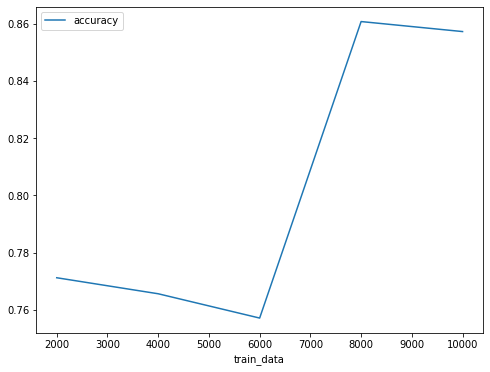

In [165]:
result_train_plot = result_train.set_index('train_data')[['accuracy']].plot(figsize=(8,6))

### 7. take less testing data and rerun the network:

In [172]:
train_data = [10000, 10000, 10000, 10000, 10000] 
test_data = [10000, 8000, 6000, 4000, 2000]
epochs_number = [4, 4, 4, 4, 4]
batch_size = [512, 512, 512, 512, 512]

result_test = testModel(train_data, test_data, epochs_number, batch_size)

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 ETA:  00:00:00


In [173]:
result_test = pd.DataFrame(result_test)
result_test

,train_data,test_data,epochs_number,batch_size,accuracy,loss
0,10000,10000,4,512,0.839500,0.384811
1,10000,8000,4,512,0.820625,0.444921
2,10000,6000,4,512,0.879333,0.346013
3,10000,4000,4,512,0.880500,0.332865
4,10000,2000,4,512,0.820000,0.449246


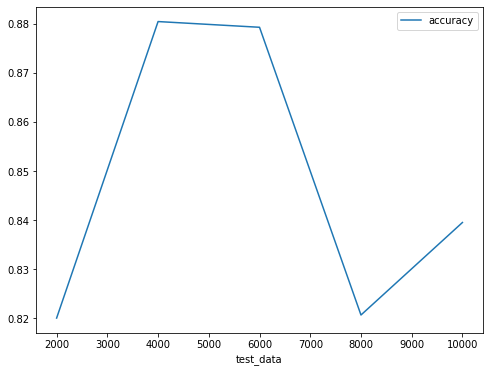

In [174]:
result_test_plot = result_test.set_index('test_data')[['accuracy']].plot(figsize=(8,6))

### 8. increase/decrease the number of epochs and the batch size
#### **epochs:**

In [ ]:
train_data = [10000, 10000, 10000, 10000, 10000, 10000, 10000] 
test_data = [10000, 10000, 10000, 10000, 10000, 10000, 10000] 
epochs_number = [1, 2, 4, 6, 10, 15, 30]
batch_size = [512, 512, 512, 512, 512, 512, 512]

result_epochs = testModel(train_data, test_data, epochs_number, batch_size)

In [ ]:
result_epochs = pd.DataFrame(result_epochs)
result_epochs

In [ ]:
result_epochs_plot = result_epochs.set_index('epochs_number')[['accuracy']].plot(figsize=(8,6))

#### **batch size:**

In [ ]:
train_data = [10000, 10000, 10000, 10000, 10000, 10000, 10000] 
test_data = [10000, 10000, 10000, 10000, 10000, 10000, 10000] 
epochs_number = [4,4,4,4,4,4,4]
batch_size = [32, 64, 128, 256, 512, 1024, 2048]

result_batch = testModel(train_data, test_data, epochs_number, batch_size)

In [ ]:
result_batch = pd.DataFrame(result_batch)
result_batch

In [ ]:
result_batch_plot = result_batch.set_index('batch_size')[['accuracy']].plot(figsize=(8,6))

### 9. make combinations of this according to your testplan. Make sure you combine with sense and intelligence and not just chaotically. 

### 10. comment your observations
- when is the accuracy increasing / decreasing

### 11. until now there were 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects the test accuracy. Use again a little table. Describe your observations.

**1 Hidden Layer:**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result_1_Layer = testModel([10000], [10000], [4], [512])
result_1_Layer = pd.DataFrame(result_1_Layer)
result_1_Layer

In [ ]:
result_1_Layer_plot = result_1_Layer.set_index('batch_size')[['accuracy']].plot(figsize=(8,6))

**2 Hidden Layer:**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result_2_Layer = testModel([10000], [10000], [4], [512])
result_2_Layer = pd.DataFrame(result_2_Layer)
result_2_Layer

In [ ]:
result_2_Layer_plot = result_2_Layer.set_index('batch_size')[['accuracy']].plot(figsize=(8,6))

**3 Hidden Layer:**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
result_3_Layer = testModel([10000], [10000], [4], [512])
result_3_Layer = pd.DataFrame(result_3_Layer)
result_3_Layer

In [ ]:
result_3_Layer_plot = result_3_Layer.set_index('batch_size')[['accuracy']].plot(figsize=(8,6))

### 12. Try to use layers with more hidden units or less hidden units: 32 units, 64 units, 128 units ...! What effect can you observe? 

### 13. Try to use the mse loss function instead of binary_crossentropy. What effect can you observe?

### 14. Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu. What effect can you observe?


---

### using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. 
You can generate the likelihood of reviews being positive by using the `predict` method:

In [35]:
model.predict(x_test)

array([[1.6406178e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [2.0092048e-05],
       [3.9458402e-05],
       [8.1761563e-01]], dtype=float32)

Print out the first 10 and the last 10 entries.
As you can see, the network is very confident for some samples (0.99, 0.05) but less confident for others (0.7, 0.2). 

----------------

In [40]:
predictions = model.predict(x_test)

In [47]:
print(predictions[:10])
print(predictions[-10:])


[[1.6406178e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.8532259e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.3542977e-09]
 [1.0000000e+00]
 [1.0000000e+00]]
[[9.1878694e-01]
 [9.6189972e-16]
 [1.0000000e+00]
 [6.4169735e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9994087e-01]
 [2.0092048e-05]
 [3.9458402e-05]
 [8.1761563e-01]]


---------------------------------
## <font color="ce33ff">SIDE PROJECT FOR IMPROVING YOUR PYTHON SKILLS</font>

**DESCRIPTION:**
Here is a way implemented to quickly decode one of the above used reviews back to English words

In [36]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode the review; note that the indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [37]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th